In [10]:
# %load_ext autoreload
# %autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../../')

import src.viz

#sns.set(style="white", context="notebook")

First look at the entropy production of a single trajectory of size T = 1000, we want to see finite sample effect ! 

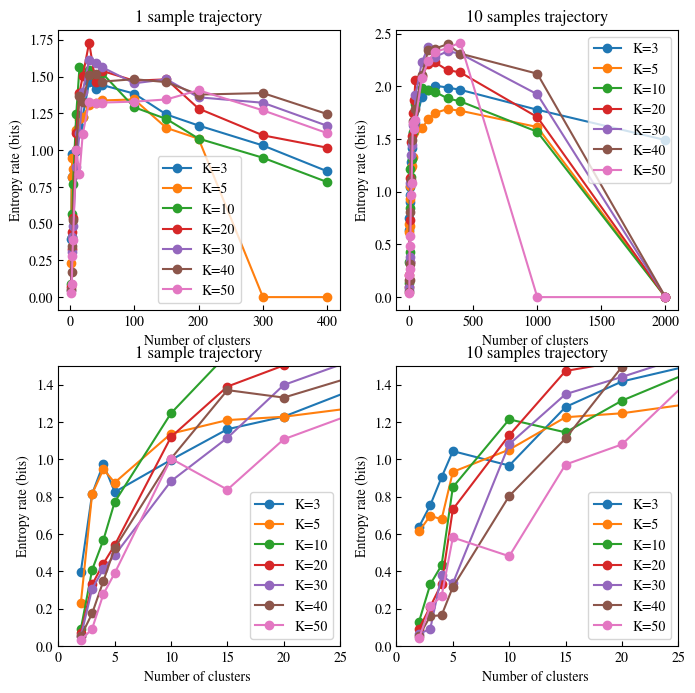

In [11]:
df = pd.read_csv('../../data/toy_model/interim/entropy_1sample.csv')
df1 = pd.read_csv('../../data/toy_model/interim/entropy_10sample.csv')
dfs = [df,df1]

title = ["1 sample trajectory", "10 samples trajectory"]

fig,ax = plt.subplots(ncols=2,nrows=2,figsize=(8,8))
for i in range(2):
    for j in range(2):
        for K, group in dfs[i].groupby("K"):
            ax[j,i].plot(group["n_clusters"], group["entropy_rate"], marker='o', label=f"K={K}")
        ax[j,i].set_xlabel("Number of clusters ")
        ax[j,i].set_ylabel("Entropy rate (bits)")
        ax[j,i].set_title(title[i])
        ax[j,i].legend()
for i in range(2):
    ax[1,i].set_xlim(0,25)
    ax[1,i].set_ylim(0,1.5)

Here, we are using simple trajectories with 10 samples, only random walks, straight lines, and helixes.

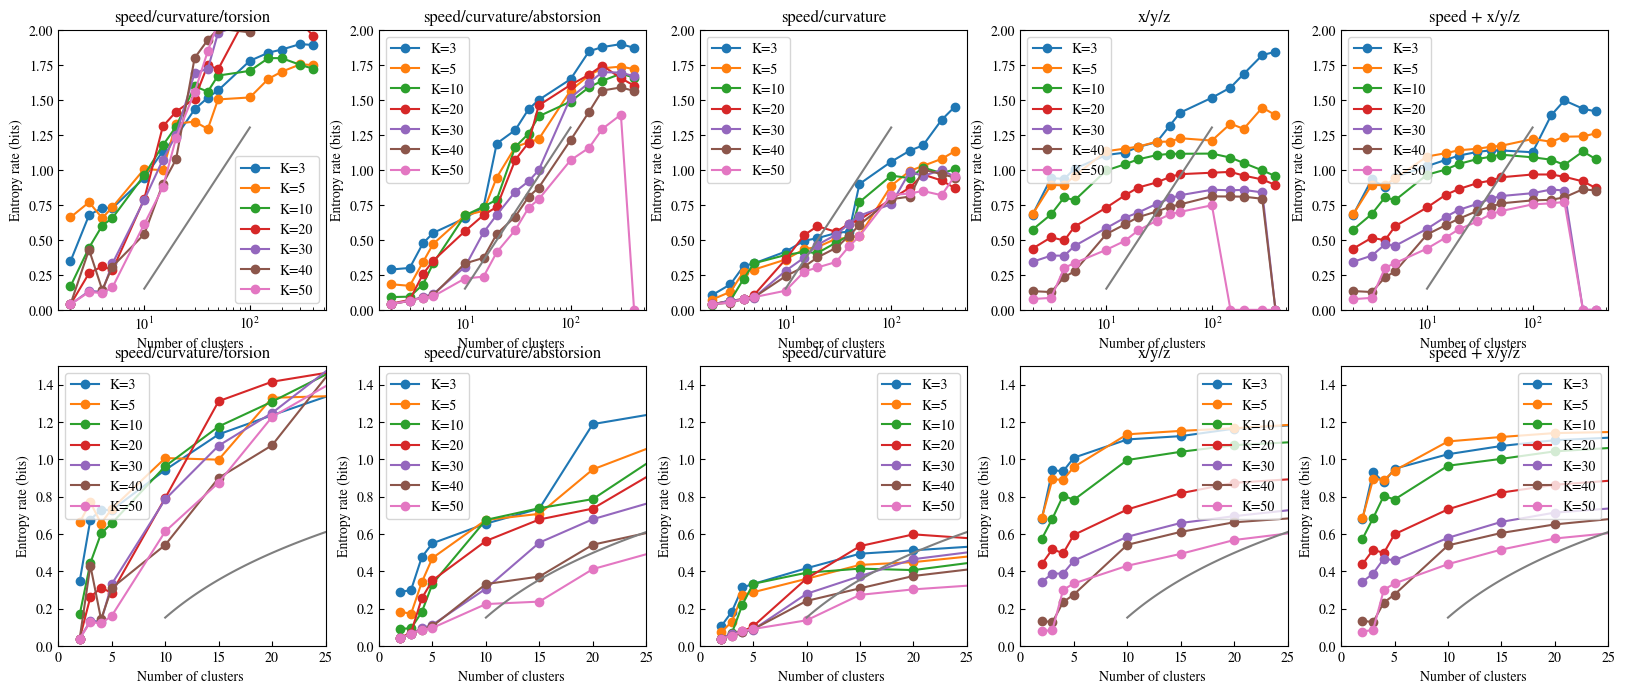

In [17]:
df = pd.read_csv('../../data/toy_model/interim/entropy_SCT.csv')
df1 = pd.read_csv('../../data/toy_model/interim/entropy_SCabsT.csv')
df2 = pd.read_csv('../../data/toy_model/interim/entropy_SC.csv')
df3 = pd.read_csv('../../data/toy_model/interim/entropy_XYZ.csv')
df4 = pd.read_csv('../../data/toy_model/interim/entropy_S_XYZ.csv')
dfs = [df,df1,df2,df3,df4]

title = ["speed/curvature/torsion", "speed/curvature/abstorsion","speed/curvature","x/y/z","speed + x/y/z"]

fig,ax = plt.subplots(ncols=5,nrows=2,figsize=(20,8))
for i in range(5):
    for j in range(2):
        for K, group in dfs[i].groupby("K"):
            ax[j,i].plot(group["n_clusters"], group["entropy_rate"], marker='o', label=f"K={K}")
        ax[j,i].plot(np.logspace(1,2,100),0.5*np.log(np.logspace(1,2,100))-1)
        ax[j,i].set_xlabel("Number of clusters ")
        ax[j,i].set_ylabel("Entropy rate (bits)")
        ax[j,i].set_title(title[i])
        ax[j,i].legend()

for i in range(5):
    ax[1,i].set_xlim(0,25)
    ax[1,i].set_ylim(0,1.5)
    ax[0,i].set_ylim(0,2)

    ax[0,i].set_xscale('log')

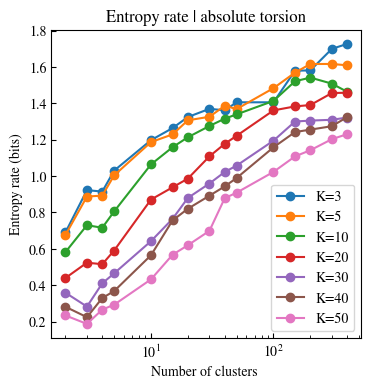

In [9]:
df = pd.read_csv('../../data/toy_model/interim/entropy_scan.csv')
fig,ax = plt.subplots(ncols=1,figsize=(4,4))
for K, group in df.groupby("K"):
    ax.plot(group["n_clusters"], group["entropy_rate"], marker='o', label=f"K={K}")

ax.set_xlabel("Number of clusters ")
ax.set_ylabel("Entropy rate (bits)")
ax.set_title("Entropy rate | absolute torsion")
ax.set_xscale('log')
ax.legend()